<a href="https://colab.research.google.com/github/gulabpatel/Data_Visualization/blob/main/Part%2005%3A%20Donut_Pareto_Sankey_StackedBar_TreeMap_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Donut Plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

## Parameters
### Shipments Data

In [3]:
df_rep = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Data_Visualization/master/dataset/donut.csv', sep=',', index_col = 0)
print('{:,} lines'.format(len(df_rep)))
df_rep.head()

10,000 lines


,Test,Order Time,Order Date,City,Store,#Shipment,Order Amount,Transmission OnTime,Transmission,Start PickPack,Pickpack,Loading,Expected Loading Date,Loading OnTime,Loading Date,Airport Arrival,Airport OnTime,Airport Arrival Date,Takeoff,Landing,Landing Date,Landing OnTime,Start Clearance,End Clearance,Leaving Airport,Store Arrival,Store Arrival Date,Delivery OnTime,Delivery Time,Extraction Time,Last Status,Reason Code,Late,Is Late,LT
0,1,2021-05-02 17:00:00.000000,2021-05-02,CITY1,CITY1/ST5,2021-05-02/CITY1/ST5/1,2759,False,2021-05-03 17:00:00.000000,2021-05-04 07:00:00.000000,2021-05-04 14:59:24.110031,2021-05-04 19:00:00.000000,2021-05-04,True,2021-05-04,2021-05-04 22:12:25.287328,True,2021-05-04,2021-05-05 06:00:00.000000,2021-05-05 17:21:54.063605,2021-05-05,True,2021-05-06 09:00:00.000000,2021-05-06 11:28:29.885088,2021-05-06 12:11:41.670951,2021-05-06 16:36:04.552300,2021-05-06,False,2021-05-07 16:30:00.000000,2021-05-11 10:00:00,Delivery Time,Multi,Late,True,4.979167
1,2,2021-05-09 12:00:00.000000,2021-05-09,CITY2,CITY2/ST9,2021-05-09/CITY2/ST9/2,1503,True,2021-05-09 13:19:07.490100,2021-05-10 07:00:00.000000,2021-05-10 13:06:21.199744,2021-05-10 19:00:00.000000,2021-05-10,True,2021-05-10,2021-05-10 21:03:12.499908,True,2021-05-10,2021-05-11 06:00:00.000000,2021-05-11 17:55:05.410750,2021-05-11,True,2021-05-12 09:00:00.000000,2021-05-12 10:40:20.644386,2021-05-12 11:24:43.182335,2021-05-12 16:19:07.938647,2021-05-12,True,2021-05-12 16:19:07.938647,2021-05-11 10:00:00,Takeoff,NaN,OnTime,False,3.179953
2,3,2021-05-02 14:00:00.000000,2021-05-02,CITY2,CITY2/ST1,2021-05-02/CITY2/ST1/3,5140,True,2021-05-02 15:32:13.222838,2021-05-03 07:00:00.000000,2021-05-03 10:02:38.267727,2021-05-03 19:00:00.000000,2021-05-03,True,2021-05-03,2021-05-03 21:57:53.558586,True,2021-05-03,2021-05-04 06:00:00.000000,2021-05-04 15:27:37.223174,2021-05-04,True,2021-05-05 09:00:00.000000,2021-05-05 10:41:51.173022,2021-05-05 11:31:39.810786,2021-05-05 14:46:07.574411,2021-05-05,True,2021-05-05 14:46:07.574411,2021-05-11 10:00:00,Delivery Time,NaN,OnTime,False,3.032032
3,4,2021-05-11 11:00:00.000000,2021-05-11,CITY4,CITY4/ST3,2021-05-11/CITY4/ST3/4,1677,True,2021-05-11 12:01:04.166619,2021-05-12 07:00:00.000000,2021-05-12 14:42:24.907373,2021-05-12 19:00:00.000000,2021-05-12,True,2021-05-12,2021-05-12 22:55:15.523629,True,2021-05-12,2021-05-13 06:00:00.000000,2021-05-13 17:23:21.684039,2021-05-13,True,2021-05-14 09:00:00.000000,2021-05-14 11:08:13.649559,2021-05-14 11:56:58.067537,2021-05-14 15:46:42.418481,2021-05-14,True,2021-05-14 15:46:42.418481,2021-05-11 10:00:00,Open,NaN,OnTime,False,3.199102
4,5,2021-05-08 10:00:00.000000,2021-05-08,CITY4,CITY4/ST1,2021-05-08/CITY4/ST1/5,4158,True,2021-05-08 10:56:14.062500,2021-05-09 07:00:00.000000,2021-05-09 15:32:46.865584,2021-05-09 19:00:00.000000,2021-05-09,True,2021-05-09,2021-05-09 22:00:24.600200,True,2021-05-09,2021-05-10 06:00:00.000000,2021-05-10 18:24:25.314204,2021-05-10,True,2021-05-11 09:00:00.000000,2021-05-11 10:37:52.951322,2021-05-11 11:17:12.114757,2021-05-11 16:00:59.003211,2021-05-11,True,2021-05-11 16:00:59.003211,2021-05-11 10:00:00,Start Clearance,NaN,OnTime,False,3.250683


In [4]:
# PARAMS
EXTRACTION_DAY = '2021-05-11'
EXTRACTION_DAY = pd.to_datetime(EXTRACTION_DAY).date()

### Find late status

In [5]:
# Count Status
df_late = df_rep[(df_rep['Last Status']== 'Delivery Time') & (df_rep['Reason Code'] != '')].copy()
df_late = pd.DataFrame(df_late.groupby(['Reason Code'])['#Shipment'].nunique())
df_late.head()

,#Shipment
Reason Code,
Delivery,406
Landing,182
Loading,73
Multi,483
Transmission,673


#### Late Shipment - Delivered

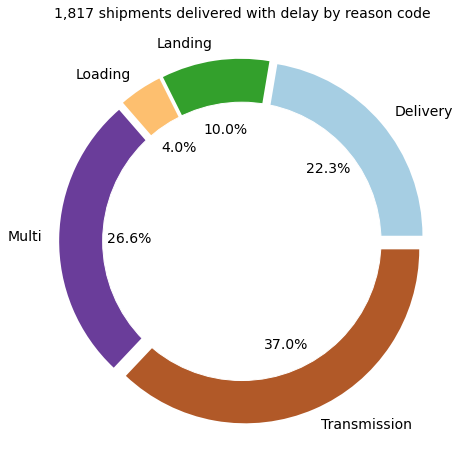

In [6]:
my_circle = plt.Circle( (0,0), 0.8, color='white')

ax = df_late.plot.pie(figsize=(8, 8),
                      y='#Shipment'
                      , legend= False, fontsize = 14, colormap='Paired', autopct='%1.1f%%', explode=(0.05, 0.05, 0.05, 
                                                                                                     0.05, 0.05))
plt.title('{:,} shipments delivered with delay by reason code'.format(df_late['#Shipment'].sum()), fontsize = 14)
plt.axis('off')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

# Pareto Chart

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

### Import Data

In [9]:
# Import
df = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Data_Visualization/master/dataset/1-2017.csv',sep=';')
print("{:,} order lines".format(len(df)))
df.head()

144,339 order lines


,DATE FORMAT,ORDER_NUMBER,SKU,BOX
0,01/01/2017,835220,290731,1.0
1,01/01/2017,835220,373272,1.0
2,01/01/2017,835214,362101,1.0
3,01/01/2017,835215,215515,1.0
4,01/01/2017,835215,287995,1.0


### Processing

In [10]:
# BOX/SKU
df_par = pd.DataFrame(df.groupby(['SKU'])['BOX'].sum())
df_par.columns = ['BOX']

# Sort Values
df_par.sort_values(['BOX'], ascending = False, inplace = True)
df_par.reset_index(inplace = True)

# Cumulative Sum 
df_par['CumSum'] = df_par['BOX'].cumsum()

# % CumSum
df_par['%CumSum'] = (100 * df_par['CumSum']/df_par['BOX'].sum())

# % SKU
df_par['%SKU'] = (100 * (df_par.index + 1).astype(float)/(df_par.index.max() + 1))

# 80% Volume
df_par80 = df_par[df_par['%CumSum'] > 80].copy()
perc_sku80 = df_par[df_par['%CumSum'] > 80]['%SKU'].min()
perc_sum80 = df_par[df_par['%CumSum'] > 80]['%CumSum'].min()

# 20% SKU
df_sku20 = df_par[df_par['%SKU'] > 20].copy()
perc_sku20 = df_sku20['%SKU'].min()
perc_sum20 = df_sku20['%CumSum'].min()

# 5% SKU
df_sku5 = df_par[df_par['%SKU'] > 5].copy()
perc_sku5 = df_par[df_par['%SKU'] > 5]['%SKU'].min()
perc_sum5 = df_par[df_par['%SKU'] > 5]['%CumSum'].min()

print("Pareto Analysis for {:,} unique SKU".format(len(df_par)))
df_par.head()

Pareto Analysis for 4,864 unique SKU


,SKU,BOX,CumSum,%CumSum,%SKU
0,359803,4810.0,4810.0,2.911658,0.020559
1,290478,4132.0,8942.0,5.412898,0.041118
2,366639,4104.0,13046.0,7.897190,0.061678
3,359958,4062.0,17108.0,10.356058,0.082237
4,253500,3879.0,20987.0,12.704149,0.102796


### Pareto Chart Plot

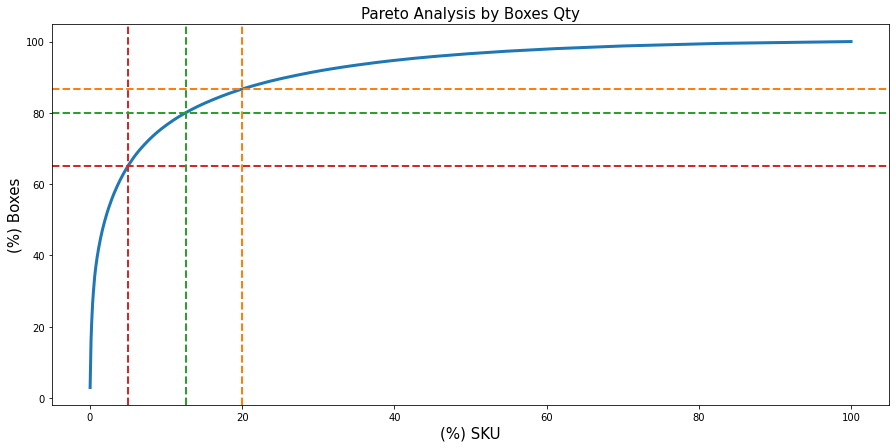

In [11]:
ax = df_par.plot(x='%SKU', y='%CumSum', figsize = (15,7), color = 'tab:blue', legend = False, linewidth=3)
plt.xlabel('(%) SKU',fontsize=15)
plt.ylabel('(%) Boxes',fontsize=15)
plt.title('Pareto Analysis by Boxes Qty', fontsize = 15)
# 5% SKU
ax.axhline(perc_sum5 , color="tab:red", linestyle="--", linewidth = 2.0)
ax.axvline(perc_sku5, color="tab:red", linestyle="--", linewidth = 2.0)
# 80% Volume
ax.axhline(perc_sum80 , color="tab:green", linestyle="--", linewidth = 2.0)
ax.axvline(perc_sku80, color="tab:green", linestyle="--", linewidth = 2.0)
# 20% SKU
ax.axhline(perc_sum20 , color="tab:orange", linestyle="--", linewidth = 2.0)
ax.axvline(perc_sku20, color="tab:orange", linestyle="--", linewidth = 2.0)
plt.show()

# Sankey Chart

In [12]:
!pip install pySankey

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pySankey.sankey import sankey

In [14]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

In [15]:
colors = {
    "INDIA": "#f71b1b",
    "BRAZIL": "#1b7ef7",
    "JAPAN": "#f3f71b",
    "GERMANY": "#12e23f",
    "USA": "#f78c1b"
}

## Import Data

### Production Quantity by From/To

In [16]:
# Production Quantity
df_prod = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Data_Visualization/master/dataset/Sankey_data.csv', index_col = 0, sep = ',')
print('{:,} lines'.format(len(df_prod)))
df_prod.head()

25 lines


,source,target,units
0,USA,USA,0.0
1,USA,GERMANY,0.0
2,USA,JAPAN,0.0
3,USA,BRAZIL,0.0
4,USA,INDIA,0.0


## Process Data Frame
### Color mapping

In [17]:
colors = {
    "INDIA": "#f71b1b",
    "BRAZIL": "#1b7ef7",
    "JAPAN": "#f3f71b",
    "GERMANY": "#12e23f",
    "USA": "#f78c1b"
}

### Build the plot

In [18]:
# Keeping only positive values
df_plot = df_prod[df_prod['units']>0].reset_index()
df_plot.head()

,index,source,target,units
0,12,JAPAN,JAPAN,1500000.0
1,15,BRAZIL,USA,1250000.0
2,18,BRAZIL,BRAZIL,145000.0
3,20,INDIA,USA,1550000.0
4,21,INDIA,GERMANY,90000.0


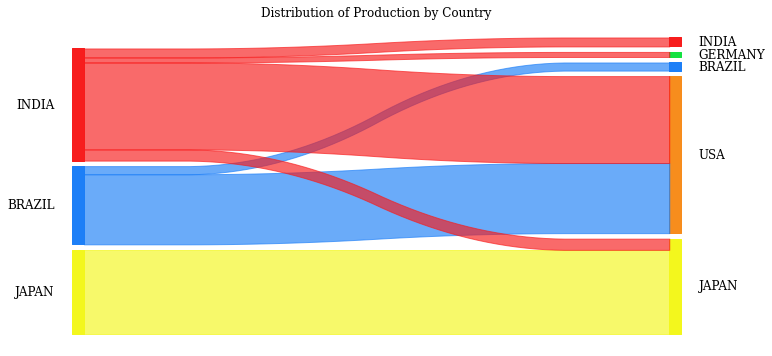

In [19]:
# Plot
sankey(
    left = df_plot["source"], right = df_plot["target"], 
    leftWeight= df_plot["units"], rightWeight = df_plot["units"], fontsize=12, colorDict=colors
)
plt.gcf().set_size_inches((12,6))
plt.title('Distribution of Production by Country')
plt.show()

# Stacked Bar Plot

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import random
random.seed(1447)

In [21]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

## Parameters
### Shipments Data

In [22]:
df_rep = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Data_Visualization/master/dataset/stacked_bar.csv', sep=',', index_col = 0)
print('{:,} lines'.format(len(df_rep)))
df_rep.head()

10,000 lines


,Test,Order Time,Order Date,City,Store,#Shipment,Order Amount,Transmission OnTime,Transmission,Start PickPack,Pickpack,Loading,Expected Loading Date,Loading OnTime,Loading Date,Airport Arrival,Airport OnTime,Airport Arrival Date,Takeoff,Landing,Landing Date,Landing OnTime,Start Clearance,End Clearance,Leaving Airport,Store Arrival,Store Arrival Date,Delivery OnTime,Delivery Time,Extraction Time,Last Status,Reason Code,Late,Is Late,LT
0,1,2021-05-02 17:00:00.000000,2021-05-02,CITY1,CITY1/ST5,2021-05-02/CITY1/ST5/1,2759,False,2021-05-03 17:00:00.000000,2021-05-04 07:00:00.000000,2021-05-04 14:59:24.110031,2021-05-04 19:00:00.000000,2021-05-04,True,2021-05-04,2021-05-04 22:12:25.287328,True,2021-05-04,2021-05-05 06:00:00.000000,2021-05-05 17:21:54.063605,2021-05-05,True,2021-05-06 09:00:00.000000,2021-05-06 11:28:29.885088,2021-05-06 12:11:41.670951,2021-05-06 16:36:04.552300,2021-05-06,False,2021-05-07 16:30:00.000000,2021-05-11 10:00:00,Delivery Time,Multi,Late,True,4.979167
1,2,2021-05-09 12:00:00.000000,2021-05-09,CITY2,CITY2/ST9,2021-05-09/CITY2/ST9/2,1503,True,2021-05-09 13:19:07.490100,2021-05-10 07:00:00.000000,2021-05-10 13:06:21.199744,2021-05-10 19:00:00.000000,2021-05-10,True,2021-05-10,2021-05-10 21:03:12.499908,True,2021-05-10,2021-05-11 06:00:00.000000,2021-05-11 17:55:05.410750,2021-05-11,True,2021-05-12 09:00:00.000000,2021-05-12 10:40:20.644386,2021-05-12 11:24:43.182335,2021-05-12 16:19:07.938647,2021-05-12,True,2021-05-12 16:19:07.938647,2021-05-11 10:00:00,Takeoff,NaN,OnTime,False,3.179953
2,3,2021-05-02 14:00:00.000000,2021-05-02,CITY2,CITY2/ST1,2021-05-02/CITY2/ST1/3,5140,True,2021-05-02 15:32:13.222838,2021-05-03 07:00:00.000000,2021-05-03 10:02:38.267727,2021-05-03 19:00:00.000000,2021-05-03,True,2021-05-03,2021-05-03 21:57:53.558586,True,2021-05-03,2021-05-04 06:00:00.000000,2021-05-04 15:27:37.223174,2021-05-04,True,2021-05-05 09:00:00.000000,2021-05-05 10:41:51.173022,2021-05-05 11:31:39.810786,2021-05-05 14:46:07.574411,2021-05-05,True,2021-05-05 14:46:07.574411,2021-05-11 10:00:00,Delivery Time,NaN,OnTime,False,3.032032
3,4,2021-05-11 11:00:00.000000,2021-05-11,CITY4,CITY4/ST3,2021-05-11/CITY4/ST3/4,1677,True,2021-05-11 12:01:04.166619,2021-05-12 07:00:00.000000,2021-05-12 14:42:24.907373,2021-05-12 19:00:00.000000,2021-05-12,True,2021-05-12,2021-05-12 22:55:15.523629,True,2021-05-12,2021-05-13 06:00:00.000000,2021-05-13 17:23:21.684039,2021-05-13,True,2021-05-14 09:00:00.000000,2021-05-14 11:08:13.649559,2021-05-14 11:56:58.067537,2021-05-14 15:46:42.418481,2021-05-14,True,2021-05-14 15:46:42.418481,2021-05-11 10:00:00,Open,NaN,OnTime,False,3.199102
4,5,2021-05-08 10:00:00.000000,2021-05-08,CITY4,CITY4/ST1,2021-05-08/CITY4/ST1/5,4158,True,2021-05-08 10:56:14.062500,2021-05-09 07:00:00.000000,2021-05-09 15:32:46.865584,2021-05-09 19:00:00.000000,2021-05-09,True,2021-05-09,2021-05-09 22:00:24.600200,True,2021-05-09,2021-05-10 06:00:00.000000,2021-05-10 18:24:25.314204,2021-05-10,True,2021-05-11 09:00:00.000000,2021-05-11 10:37:52.951322,2021-05-11 11:17:12.114757,2021-05-11 16:00:59.003211,2021-05-11,True,2021-05-11 16:00:59.003211,2021-05-11 10:00:00,Start Clearance,NaN,OnTime,False,3.250683


In [23]:
# PARAMS
EXTRACTION_DAY = '2021-05-11'
EXTRACTION_DATE = '{} 10:00:00'.format(EXTRACTION_DAY)
EXTRACTION_DAY = pd.to_datetime(EXTRACTION_DAY).date()

In [24]:
# Group by date
df_stat = pd.DataFrame(df_rep.groupby(['Order Date', 'Last Status'])['#Shipment'].nunique())
df_stat.columns = ['#Shipments']
df_stat = pd.pivot_table(df_stat.reset_index(), index = 'Order Date', columns = 'Last Status', 
                         values = '#Shipments', aggfunc = np.sum).fillna(0)

df_plot = df_stat.reset_index()
df_plot['Order Date'] = pd.to_datetime(df_plot['Order Date']).dt.date
df_plot = df_plot[df_plot['Order Date']<=EXTRACTION_DAY]
df_plot.head()

Last Status,Order Date,Delivery Time,End Clearance,Leaving Airport,Open,Order Time,Pickpack,Start Clearance,Start PickPack,Takeoff
0,2021-05-01,531.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-05-02,506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-05-03,508.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-05-04,523.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-05,516.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


### Plot Number of Shipments per status

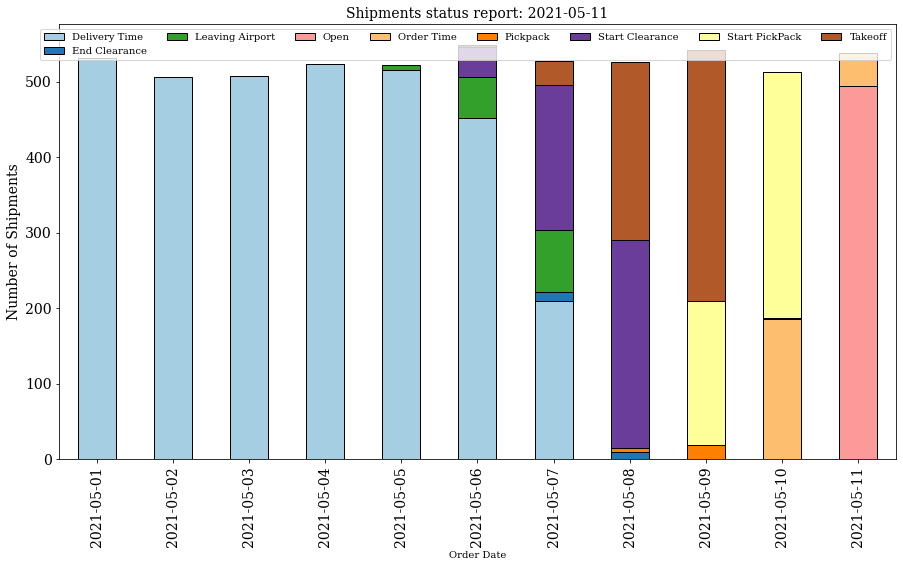

In [25]:
ax = df_plot.reset_index().plot.bar(figsize=(15, 8), edgecolor='black', x = 'Order Date',
                      y=df_stat.columns
                      , legend= True, fontsize = 14, stacked = True, colormap='Paired')
plt.ylabel('Number of Shipments', fontsize = 14)
plt.title('Shipments status report: {}'.format(EXTRACTION_DAY), fontsize = 14)
ax.legend(ncol=8)
plt.show()

# TreeMap Plot

In [26]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import numpy as np
import pandas as pd
import squarify
import matplotlib
import matplotlib.pyplot as plt

In [28]:
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

## Import Data
### Replenishments number by locations

In [29]:
df_repl = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Data_Visualization/master/dataset/Replenishment.csv', sep =',', index_col = 0)
print('{:,} records'.format(len(df_repl)))
df_repl.head()

8,099 records


,DAY,SKU,Location,Alley,AlleyCell,Max,Min,WEEK-1,WEEK-2,WEEK-3,WEEK-4,WEEK-5,Capacity
0,FRI,2354,A0617402,A06,A0617,80.0,60.0,0.0,1.0,1.0,0.0,0.0,20
1,FRI,5028,A0703503,A07,A0703,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,FRI,8972,A0527401,A05,A0527,120.0,90.0,1.0,2.0,0.0,1.0,0.0,30
3,FRI,10116,A0742501,A07,A0742,144.0,108.0,0.0,1.0,0.0,0.0,0.0,36
4,FRI,11259,A0608303,A06,A0608,200.0,150.0,1.0,3.0,2.0,0.0,0.0,50


## Plot Split of Replenishment
### Process the Dataframe

In [30]:
# Filter by Week Number
wk = 'WEEK-2'
df_plot = df_repl[df_repl[wk]>0][['Alley', wk]].copy()
print('{:,} records'.format(len(df_plot)))
df_plot.head()

4,325 records


,Alley,WEEK-2
0,A06,1.0
2,A05,2.0
3,A07,1.0
4,A06,3.0
5,A05,1.0


In [31]:
# Unique Alleys
print(list(df_plot.Alley.unique()))
dict_color = dict(zip(['A05', 'A06', 'A04', 'A07', 'A02', 'R04', 'A01', 'A08', 
                       'R05', 'A03', 'A09', 'A10', 'H02', 'B03', 'A11', 'R06']
                      , ['blue', 'red', 'yellow', 'orange', 'brown', 'cyan', 'tab:blue', 'tab:red', 
 'lightblue', 'tab:orange', 'grey', 'tab:green', 'purple', 'darkblue', 'white', 'magenta']))

['A06', 'A05', 'A07', 'A04', 'A02', 'R04', 'A08', 'A03', 'A01', 'R05', 'A09', 'A10', 'H02', 'B03', 'A11', 'R06']


In [32]:
# Processing
df_plot = pd.DataFrame(df_plot.groupby(['Alley'])[wk].sum())
df_plot['%'] = (100*df_plot[wk]/df_plot[wk].sum()).round(2)
df_plot.reset_index(inplace = True)
df_plot['LABEL'] = df_plot[['Alley','%']].apply(lambda t: t['Alley'] +'\n' + str(t['%']) + '%', axis = 1)
df_plot.head()

,Alley,WEEK-2,%,LABEL
0,A01,127.0,0.57,A01\n0.57%
1,A02,1238.0,5.52,A02\n5.52%
2,A03,1077.0,4.80,A03\n4.8%
3,A04,3020.0,13.46,A04\n13.46%
4,A05,899.0,4.01,A05\n4.01%


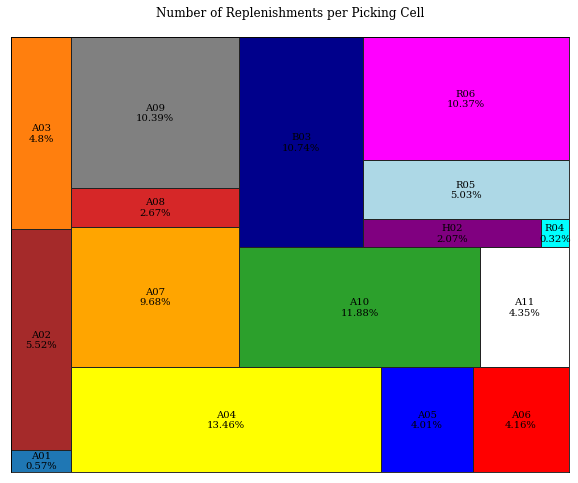

In [33]:
# Plot
plt.figure(figsize=(10, 8))
tree_map = squarify.plot(sizes = df_plot[wk], color = df_plot['Alley'].map(dict_color)
            , label = df_plot['LABEL']
            , edgecolor="#222222", text_kwargs={'fontsize':10})
plt.axis('on')
plt.title('Number of Replenishments per Picking Cell' +'\n', fontsize=12)
tree_map.axes.xaxis.set_visible(False)
tree_map.axes.yaxis.set_visible(False)
plt.show()